In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

fruits = pd.read_table('fruit_data_with_colors.txt')

In [16]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Create train-test split

In [2]:
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
## train_test_split from scikitlearn

## Create classifier object -- KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## Train the classifier (fit the estimator) using the training data

In [4]:
knn.fit(x_train, y_train) #memorizes the training dataset for future use

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Estimate the accuracy of the classifier on future data, using the test data

In [5]:
knn.score(x_test, y_test)  # score method for the classifier object

0.5333333333333333

In [6]:
# The accuracy is defined as the fraction of test set items whose true labels was correctly predicted by the classifier

In [12]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

# Plot the decision boundaries of the K-NN classifier

In [14]:
from adapy_shared_utilities import plot_fruit_knn

ModuleNotFoundError: No module named 'adapy_shared_utilities'

<IPython.core.display.Javascript object>


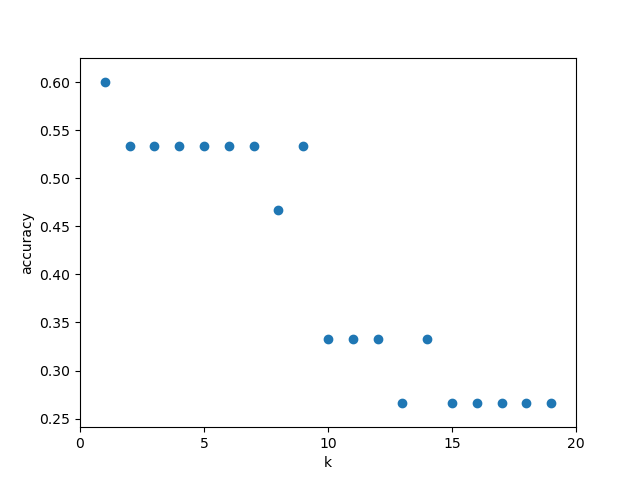

([<matplotlib.axis.XTick at 0x184f5932220>,
 <a list of 5 Text xticklabel objects>)

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])